In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)','sepal width (cm)']]
# целевое значение
data_class = iris.target 
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lda = LinearDiscriminantAnalysis()

In [8]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
y_predict = lda.predict(X_test)

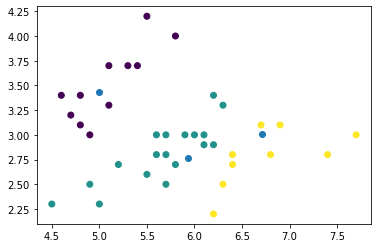

In [10]:
#5 Визуализация предсказания для тестовой выборки
# plt.scatter(lda.predict(X_test), y_test)
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_predict)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1])
plt.show()

In [28]:
X = data[['sepal length (cm)']]
y = data['sepal width (cm)']

In [29]:
from sklearn.cluster import KMeans

In [30]:
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

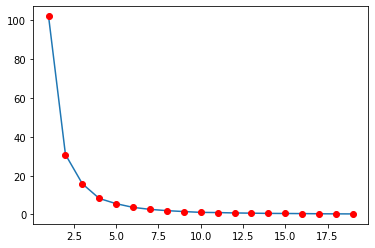

In [31]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [32]:
# на первый взгляд тут 4 кластера
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X)
clusters

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 3, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 3, 1, 1, 3, 2, 3, 1, 3,
       1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

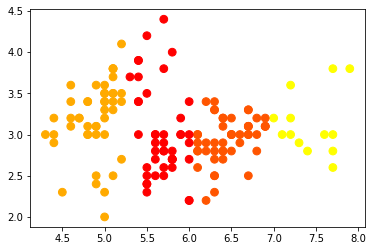

In [45]:
plt.scatter(X, y, cmap='autumn', c=clusters, s=60)